In [1]:
# Package um Pfade zu bearbeiten, in denen nach Dateien gesucht wird
import sys

# Hinzufügen eines Pfads, in dem sich zum Beispiel selbst geschriebene Packages oder auch Messdaten befinden können
path = 'C:/Users/Timon/Desktop/Uni/GP'
if path not in sys.path:
    sys.path.append(path)
    
# import von Packages, zur Datenbearbeitung und zum Plotten

import numpy as np                  # Package, um Arrays zu erstellen und zu bearbeiten
import pandas as pd                 # Package um Dataframes zu erstellen
import matplotlib.pyplot as plt     # Package zum plotten

from scipy.optimize import curve_fit    # Package zum Fitten von Daten

In [2]:
# Einlesen der Daten 
# Strukturier die Daten am besten in Dictionarys, wie in TK 29. Dann kannst du darüber auch iterieren und musst nicht 
# alles einzeln plotten

# Gamma-Spektren
N8 = pd.read_csv('Messung_TK48/lin/Null0,8kV.txt', sep='\t', engine='python')
N85 = pd.read_csv('Messung_TK48/lin/Null0,85kV.txt', sep='\t', engine='python')
Am_r = pd.read_csv('Messung_TK48/lin/Am0,8kV.txt', sep='\t', engine='python')
Na_r = pd.read_csv('Messung_TK48/lin/Na0,8kV.txt', sep='\t', engine='python')
Cs_r = pd.read_csv('Messung_TK48/lin/Cs0,8kV.txt', sep='\t', engine='python')
RCs_r = pd.read_csv('Messung_TK48/lin/Rück0,85kV.txt', sep='\t', engine='python')
# Die Pfade sind hier relativ zu deinem ipynb-File, also deinem Notebook
# Mit 'sep' definierst du das Zeichen, mit dem deine Werte getrennt werden, hier sind es Tabs
# Damit Tabs durch '\t' definiert werden können muss engine='python' gewählt werden
# Weitere Infos zu 'read_csv' findest du in der Dokumentation von Pandas

# Comptonstreuung
S60_r = pd.read_csv('Messung_TK48/str/60.txt', sep='\t', engine='python')
S90_r = pd.read_csv('Messung_TK48/str/90.txt', sep='\t', engine='python')
S120_r = pd.read_csv('Messung_TK48/str/120.txt', sep='\t', engine='python')

In [3]:
# Abziehen der Hintergrundspektren von den Spektren der Proben
Am = Am_r.N-N8.N
Na = Na_r.N-N8.N
Cs = Cs_r.N-N8.N
RCs = RCs_r.N-N85.N

S60 = S60_r.N-N85.N
S90 = S90_r.N-N85.N
S120 = S120_r.N-N85.N

# Definition der Variable, die die Daten für die Abszisse enthält
# stattdessen wäre es sauberer die Daten wieder in einen neuen Dataframe zusammenzufassen
K = Am_r.K

# Definition von Fitfunktionen
def gfit(k, a, b, c):   #Gaußfit
    return a*np.exp(-(k-b)**2/c)

def gfit_v(k, a, b, c, n):
    return a*np.exp(-(k-b)**2/c)+n

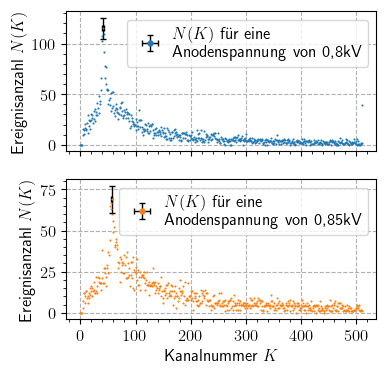

In [10]:
'''
Ich benutze hier Inlineplotting, die Plots werden also im Notebook angezeigt, wobei diese aber nicht interaktiv sind. 
Durch änderung des Backends können die Plots auch interaktiv sein.

Am wichtigsten sind dabei "%matplotlib notebook" und "%matplotlib qt5". Mit notebook bekommst du einen inline Plot,
der interaktiv ist. Der Nachteil dabei ist, dass es auch eine "pick" funktion gibt, bei welcher du einen Algorithmus 
definierst der durchlaufen werden soll, wenn du einen Wert im Plot anklickst. Damit kannst du dir dann zum Beispiel die 
Koordinaten des jeweiligen Punkts ausgeben lassen. Das funktioniert aber nicht bei inline Plots, weshalb du hier qt5, 
oder ein anderes Backend verwenden musst, welches den Plot in einem neuen Fenster öffnet. Für den Wechsel zwischen qt5 
und notebook musst du leider den Kernel neu starten, weshalb ich hauptsächlich inline und qt5 verwende, zwischen denen 
man ohne neustart wechseln kann.

Eine letzte Anmerkung ist, dass die zur Verfügung stehenden Backends von System zu System unterschiedlich sein können, 
aber ich würde davon ausgehen, dass die hier funktionieren.
'''

%matplotlib inline      # matplotlib-magic um Plot im Notebook zu zeigen
plt.style.use('default')    # zurücksetzen des Plotstils
plt.rc('figure', figsize=(4,4), dpi=100)    # Größe des Plots einstellen
plt.rcParams['font.size'] = 12      # Schriftgröße einstellen
plt.rc('lines', ls='', marker='o', mew=0, markersize=1.5)   # Linienstil, Marker usw. der Plots einstellen 
# (ls = linestyle, mew = markeredgewidth)

plt.rc('text', usetex=True)     # Tex-Schrift benutzen

fig, ax = plt.subplots(2,1, sharex=True)    # Erstellung der Figure und der Axes, in denen die Daten geplottet werden

# Plotten der Untergrundspektren
ax1, = ax[0].plot(K, N8.N)
ax2, = ax[1].plot(K, N85.N, c='tab:orange')
# die Variablen ax1 und ax2 werden mit den Plots definiert, um später auf diese zuzugreifen. 
# Das "," wird benötigt, um das Objekt auf der rechten Seite, also die Plots zu entpacken

# Berechnung und plotten der exemplarischen Fehlerbalken
ax3 = ax[0].errorbar(N8.K[N8.N==N8.N.max()], N8.N[N8.N==N8.N.max()], xerr=1, yerr=np.sqrt(N8.N.max()),
                     ecolor='k', capthick=1, capsize=2, elinewidth=1, c=ax1.get_color())

ax4 = ax[1].errorbar(N85.K[N85.N==N85.N.max()], N85.N[N85.N==N85.N.max()], xerr=1, yerr=np.sqrt(N85.N.max()),
                     ecolor='k', capthick=1, capsize=2, elinewidth=1, c=ax2.get_color())
# wenn du mit errorbar plottest musst du kein Komma hinter die Variable setzen

# Raster und kleine Zwischenstriche einstellen und Beschriftung der Ordinate mit einer Schleife
for i in range(2):
    ax[i].minorticks_on()
    ax[i].grid(ls='--')
    ax[i].set_ylabel('Ereignisanzahl $N(K)$')
    
# Beschriftung der Abszisse
ax[1].set_xlabel('Kanalnummer $K$')

# erstellung der Legende
ax[0].legend([ax3], ['$N(K)$ für eine \n Anodenspannung von 0,8kV'], markerscale=3, handletextpad=0.3)
ax[1].legend([ax4], ['$N(K)$ für eine \n Anodenspannung von 0,85kV'], markerscale=3, handletextpad=0.3)

# Speichern des Plots
# plt.savefig('Unterg.pdf', bbox_inches='tight')

[[  34.          235.          301.        ]
 [5067.           36.         2625.        ]
 [  71.18286311    6.           51.23475383]]
[5.09955466e+03 3.36154983e+01 5.08113507e+00] [9.52447757e+01 3.43749950e-02 2.19163055e-01]
[ 29.70923857 235.7189126  109.21052403] [ 1.21779382  0.35611401 11.66746746]
[2545.48025109  299.93735652  136.58662993] [17.35468855  0.06505628  2.15086542]


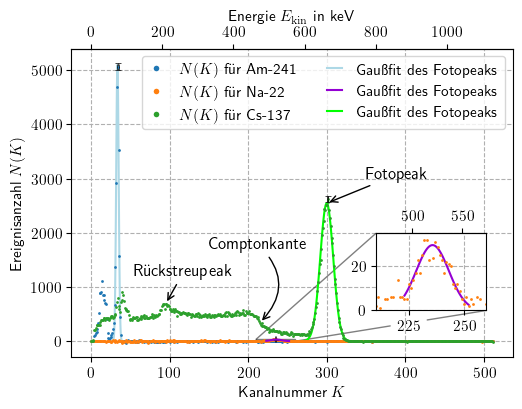

In [14]:
%matplotlib inline
plt.style.use('default')
plt.rc('lines', ls='', marker='o', markersize=2, mew=0)
plt.rc('figure', figsize=(5.7,4))
plt.rcParams['font.size'] = 11
plt.rc('text', usetex=True)

fig, ax = plt.subplots()

# Definition der Fehler (Die Anzahl der gezählten Quanten ist Poisson-Verteilt, deshalb ist der 
# Fehler die Wurzel aus der gemessenen Anzahl)
DAm = [Am[Am==Am.max()].index.values[0], Am.max(), np.sqrt(Am.max())]
DNa = [Na[Na==Na.max()].index.values[0], Na.max(), np.sqrt(Na.max())]
DCs = [Cs[Cs==Cs.max()].index.values[0], Cs.max(), np.sqrt(Cs.max())]

# Zusammenfassen der Fehler in ein Array
p_err = np.array([DAm, DNa, DCs]).T
print(p_err)

# Plotten der Spektren
axA, = ax.plot(K, Am)
axN, = ax.plot(K, Na)
axC, = ax.plot(K, Cs)

# Plotten der Fehler
ax.errorbar(p_err[0,:], p_err[1,:], xerr=1, yerr=p_err[2,:],
            marker='', ecolor='k', capthick=0.5, capsize=2, elinewidth=0.5)
# Wenn du nichts mit den eckigen Klammern anfangen kannst auch mal nach "slicing Python array" oder so

# Definition des Intervalls, in dem die Gaußfits liegen sollen
fA = Am[(Am.index>22)&(Am.index<43)]
fN = Na[(Na.index>223)&(Na.index<253)]
fC = Cs[(Cs.index>272)&(Cs.index<331)]


# Berechnung der Fitparameter

# Am besten du liest dir die Dokumentation zu scipy.curve_fit durch aber hier ist ne kurze Zusammenfassung

# Die Funktion curve_fit nimmt als ersten Parameter die zu verwendende Fitfunktion, dann die Werte auf der Abszisse und 
# als drittes die Werte auf der Ordinate

# Zudem können noch zusätzliche 'keywordarguments' verwendet werden, was hier 'p0' ist, womit sich die Startwerte 
# oder 'initial guess' festlegen lässt

# die Reihenfolge der Werte in der liste von p0 entspricht dabei der Reihenfolge bei der Definition der Fitfunktion

# Die Funktion gibt zwei Arrays aus, wobei das erste den optimierten Parametern und das zweite der 
# Kovarianzmatrix entspricht

# Die Wurzeln aus den diagonalen Werten der Kovarianzmatrix entsprechen den Fehlern der jeweiligen 
# optimierten Fitparametern

# Hier bezeichne ich die optimierten Parameter mit poptA/N/C und die Kovarianzmatrizen als pcovA/N/C
poptA, pcovA = curve_fit(gfit, fA.index, fA, p0=[5067, 34, 1])
poptN, pcovN = curve_fit(gfit, fN.index, fN, p0=[36, 235, 1])
poptC, pcovC = curve_fit(gfit, fC.index, fC, p0=[2625, 301, 1])

# Berechnung der Fehler
perrA = np.sqrt(np.diag(pcovA))
perrN = np.sqrt(np.diag(pcovN))
perrC = np.sqrt(np.diag(pcovC))

# Drucken der resultierenden optimierten Parameter und der Fehler
print(poptA, perrA)
print(poptN, perrN)
print(poptC, perrC)

# Erstellung von Arrays, die die x-Werte enthalten, für welche die Fitfunktion ausgewertet wird
xA = np.linspace(23, 42, 100)
xN = np.linspace(223, 252, 100)
xC = np.linspace(272, 331, 100)

# Auswerten der Fitfunktion für die zuvor definierten x-Werte und mit den optimierten Parametern
# Durch das '*' kannst du dir sparen die Komponenten des Arrays einzeln einzufügen, 
# also 'popt[0], popt[1],...' zu schreiben
fitA = gfit(xA, *poptA)
fitN = gfit(xN, *poptN)
fitC = gfit(xC, *poptC)

# plotten der Fits
axfA, = ax.plot(xA, fitA, ls='-', marker='', c='lightblue', zorder=1.9)
axfN, = ax.plot(xN, fitN, ls='-', marker='', c='darkviolet', zorder=2)
axfC, = ax.plot(xC, fitC, ls='-', marker='', c='lime', zorder=1.9)

# Abszisse und Ordinate beschriften und Raster einstellen
ax.set_xlabel('Kanalnummer $K$')
ax.set_ylabel('Ereignisanzahl $N(K)$')
ax.grid(ls='--')

# Hinzufügen von Text und Pfeilen, die auf bestandteile der Plots deuten
# Die ersten Koordinaten entsprechen der Position der Pfeilspitze und die zweiten Koordinaten der Position 
# der linken unteren Ecke des Textes

# Dem keywordargument 'arrowpops' kannst du ein Dictionary geben, welches die Eigenschaften der verwendeten Pfeile enthält

# Such am besten in der Matplotlib Dokumentation nach Annotate, wo du auch einen Link 
# zu Advanced Annotations finden solltest
ax.annotate('Fotopeak', (299.9, 2545.5), (350, 3000), arrowprops=dict(arrowstyle='->'), fontsize=12)
ax.annotate('Rückstreupeak', (95, 691), (55, 1200), arrowprops=dict(arrowstyle='->'), fontsize=12)
ax.annotate('Comptonkante', (215, 342), (150, 1700),
            arrowprops=dict(arrowstyle='->', connectionstyle='Arc3, rad=-0.5'), fontsize=12)

# Definition von Funktionen, die von der Kanalnummer zu entsprechender Energie und umgekehrt umrechnen, 
# um eine zweite x-Achse einzufügen
def k2en(k):
    return 662/poptC[1]*k
    
def en2k(k):
    return k*poptC[1]/662

# Einfügen einer zweiten Axe, mit Position und der zuvor definierten Hin- und Rücktransformation
secax = ax.secondary_xaxis('top', functions=(k2en, en2k))

# Beschriftung der zweiten Axe
secax.set_xlabel('Energie $E_{\mathrm{kin}}$ in keV')

# Erstellung eines eingesetzten Plots zum Zoomen
# Die ersten zwei Zahlen entsprechen der Position der linken unteren Ecke des Fensters in relativen Koordinaten, 
# also 1 ist ganz rechts/oben und 0 ganz links/unten. Die letzten zwei Zahlen geben gleichermaßen die Breite 
# und Höhe des Fensters an
axins = ax.inset_axes([0.69, 0.15, 0.25, 0.25])

# Plotten der Darzustellenden Daten
axins.plot(xN, fitN, ls='-', marker='', c='darkviolet', zorder=2)
axins.plot(K, Na, c='tab:orange')

# Einstellen des Darzustellenden x- und y-Intervalls
axins.set_xlim(210, 260)
axins.set_ylim(0, 35)
axins.grid(ls='--')

# Einfügen der zweiten Abszisse in dem eingesetzten Plot
sein = axins.secondary_xaxis('top', functions=(k2en, en2k))

# Einfügen von Linien, die den Zoom andeuten, wobei 're' und 'con' definiert werden, 
# mit denen auf die Umrandung('rectangle') und die Verbindungslinien('connections')
# verwiesen werden kann
re, con = ax.indicate_inset_zoom(axins, edgecolor='k', zorder=1.8)

# Definition eines neuen Linienstils einer der Verbindungslinien, damit bei '225' eine Lücke ist
# Die Syntax ist (Offset(Länge Strich 1, Länge Lücke 1, Länge Strich 2,...)) das so angegebene Muster 
# wiederholt sich nach einem Durchlauf
con[2].set_ls((0,(43,27,100)))

# Einfügen der Legende
ax.legend([axA, axN, axC, axfA, axfN, axfC], [r'$N(K)$ für Am-241',
                                              r'$N(K)$ für Na-22',
                                              r'$N(K)$ für Cs-137',
                                              r'Gaußfit des Fotopeaks',
                                              r'Gaußfit des Fotopeaks',
                                              r'Gaußfit des Fotopeaks'],
          ncol=2, handlelength=1, handletextpad=1, markerscale=2)

# plt.savefig('quell.pdf', bbox_inches='tight')